In [1]:
import sys; 
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from src.simple_utils import load_pickle
from src.data_utils import cifar10_label_names, get_dataset
from os.path import join

print("loading data ...")
grouped = load_pickle('../processed/cifar10/resnets/group.pkl')
scores = load_pickle('../processed/cifar10/resnets/scores.pkl')
print("done")


# Test sets in this data
test_sets = ["CIFAR10_test", "CIFAR10v2_test", "CINIC10_test"]
# name of training dataset
train_set = "CIFAR10_train"


print("loading dataset ...")
dataset = {}
labels = {}

for name in test_sets: 
    dataset[name] = get_dataset('../data', name)
    labels[name] = np.array(dataset[name].targets)
print("done")

In [3]:
classes = cifar10_label_names

# number of point figures to plot
num_figs = 10

# Dataset name


# Point type
ind_types = ["points", "small", "weird"]
ind_type = ind_types[2]

# Plots params 
fmts = {
    "Resnet18": "bo",
    "Densenet121": "ro",
    "Resnet18-pretrained": "c^",
    "Densenet121-pretrained": "m^",
    "ClipViTB32": "go",
}
alpha = 0.5
markersize = 12

if ind_type == "weird":
    indexes = scores[name]["idx"][:num_figs].astype(int)
elif ind_type == "small":
    indexes = scores[name]["idx"][-num_figs:].astype(int)
elif ind_type == "points":
    indexes = ind_fixed[:num_figs]
else:
    raise ValueError("unavailable index type %s" % ind_type)
    

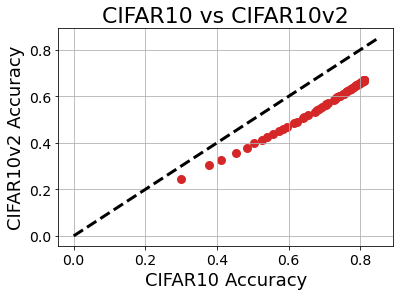

In [13]:
def aggregate_scores(dct):
    x = dct["x"]
    return dct["x"], np.mean(dct["points"], axis = 0)
   

name=test_sets[1]
arch = "Resnet18"

dct = grouped[name][arch]


## Figure 1(a)

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

x,y = aggregate_scores(dct) 

plt.scatter(x, y, color='tab:blue')
plt.plot(np.linspace(0.0, 0.85, 40), np.linspace(0.0, 0.85, 40), '--', color='black', linewidth=3)

plt.scatter(x, y, color='tab:red', linewidth=3)
plt.gcf().axes[0].set_title(f'CIFAR10 vs CIFAR10v2', fontsize=22)
plt.xlabel('CIFAR10 Accuracy')
plt.ylabel(f'CIFAR10v2 Accuracy')
plt.grid(True)

# plt.xlim(-0.0, 0.81)

# plt.savefig('figures/intro_first1.pdf', dpi=100,
#         bbox_inches='tight')


# plt.legend()
plt.show()


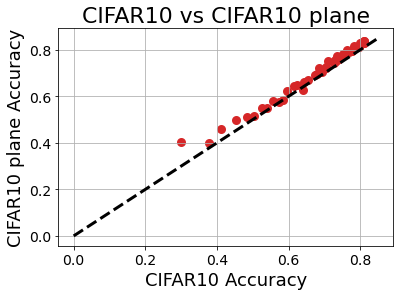

In [26]:
## Figure 1(b)

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

name=test_sets[0]
arch = "Resnet18"

dct = grouped[name][arch]


x,y = dct["x"], dct["labels"][0]

plt.scatter(x, y, color='tab:blue')
plt.plot(np.linspace(0.0, 0.85, 40), np.linspace(0.0, 0.85, 40), '--', color='black', linewidth=3)

plt.scatter(x, y, color='tab:red', linewidth=3)
plt.gcf().axes[0].set_title(f'CIFAR10 vs CIFAR10 plane', fontsize=22)
plt.xlabel('CIFAR10 Accuracy')
plt.ylabel(f'CIFAR10 plane Accuracy')
plt.grid(True)

# plt.xlim(-0.0, 0.81)

# plt.savefig('figures/intro_first1.pdf', dpi=100,
#         bbox_inches='tight')


# plt.legend()
plt.show()


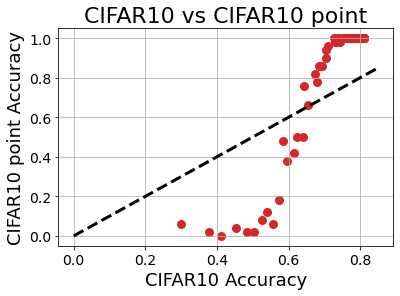

In [40]:
## Figure 1(c)

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

name=test_sets[0]
arch = "Resnet18"

dct = grouped[name][arch]

idx = scores[name]["idx"][-515].astype(int)

x,y = dct["x"], dct["points"][idx]

plt.scatter(x, y, color='tab:blue')
plt.plot(np.linspace(0.0, 0.85, 40), np.linspace(0.0, 0.85, 40), '--', color='black', linewidth=3)

plt.scatter(x, y, color='tab:red', linewidth=3)
plt.gcf().axes[0].set_title(f'CIFAR10 vs CIFAR10 point', fontsize=22)
plt.xlabel('CIFAR10 Accuracy')
plt.ylabel(f'CIFAR10 point Accuracy')
plt.grid(True)

# plt.xlim(-0.0, 0.81)

# plt.savefig('figures/intro_first1.pdf', dpi=100,
#         bbox_inches='tight')


# plt.legend()
plt.show()


3390
